# CLIP
1. Large Datasets:
CLIP is trained over WebImage Text(WIT) 400M image-text pair. Diverse dataset crawled from the internet. More data is better.

2. Contrastive Pre-Training:
<img src="https://miro.medium.com/v2/resize:fit:1400/0*XrBziT7pl8NVCwNA" width="600"/>

3. Application of CLIP
- Zero Shot Image classification: Using Clip embedding out of the box to do zero shot image classification.
- Fine Tuned Image Classification: Adding a classification head and fine tune the head for specific fine-grained systematic image classification.
- Semantic Image Retrieval : Text to image and Reverse Image search both are possible with rich CLIP embeddings.
- Image Captioning : With the feature vectors from CLIP have been wired into GPT-2 to output an English description for a given image
- Deciphering Blurred Images

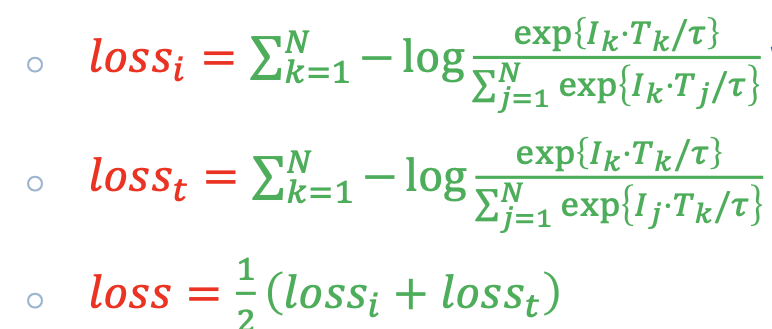

In [25]:
from IPython.display import Image

# Specify the path to your image file
image_path = '/content/Screen Shot 2023-10-07 at 10.36.23.png'

# Display the image
Image(filename=image_path, width=500, height=200)


In [26]:
!pip install transformers

In [30]:
from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

In [29]:
from PIL import Image
import requests
def image_grid(imgs, cols):
    rows = (len(imgs) + cols - 1) // cols
    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))

    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

image_urls = [
    'http://images.cocodataset.org/val2014/COCO_val2014_000000100000.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000100001.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000100010.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000100006.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000100008.jpg',
    'http://images.cocodataset.org/val2014/COCO_val2014_000000100016.jpg'
    ]
images = []
for url in image_urls:
    images.append(Image.open(requests.get(url, stream=True).raw))

grid = image_grid(images, cols=3)
display(grid)

Output hidden; open in https://colab.research.google.com to view.

## Image classification

In [31]:
classes = ['cat', 'car', 'human']
inputs = processor(text=classes, images=images,
                   return_tensors="pt", padding=True)

outputs = model(**inputs)
# this is the image-text similarity score
logits_per_image = outputs.logits_per_image
# we can take the softmax to get the label probabilities
probs = logits_per_image.softmax(dim=1)
print(probs)

tensor([[9.5783e-01, 8.0668e-03, 3.4101e-02],
        [2.0840e-02, 2.7891e-01, 7.0025e-01],
        [5.7626e-03, 2.7404e-02, 9.6683e-01],
        [4.8707e-05, 9.9858e-01, 1.3710e-03],
        [9.1343e-01, 1.3448e-03, 8.5224e-02],
        [1.4363e-02, 6.0001e-01, 3.8563e-01]], grad_fn=<SoftmaxBackward0>)


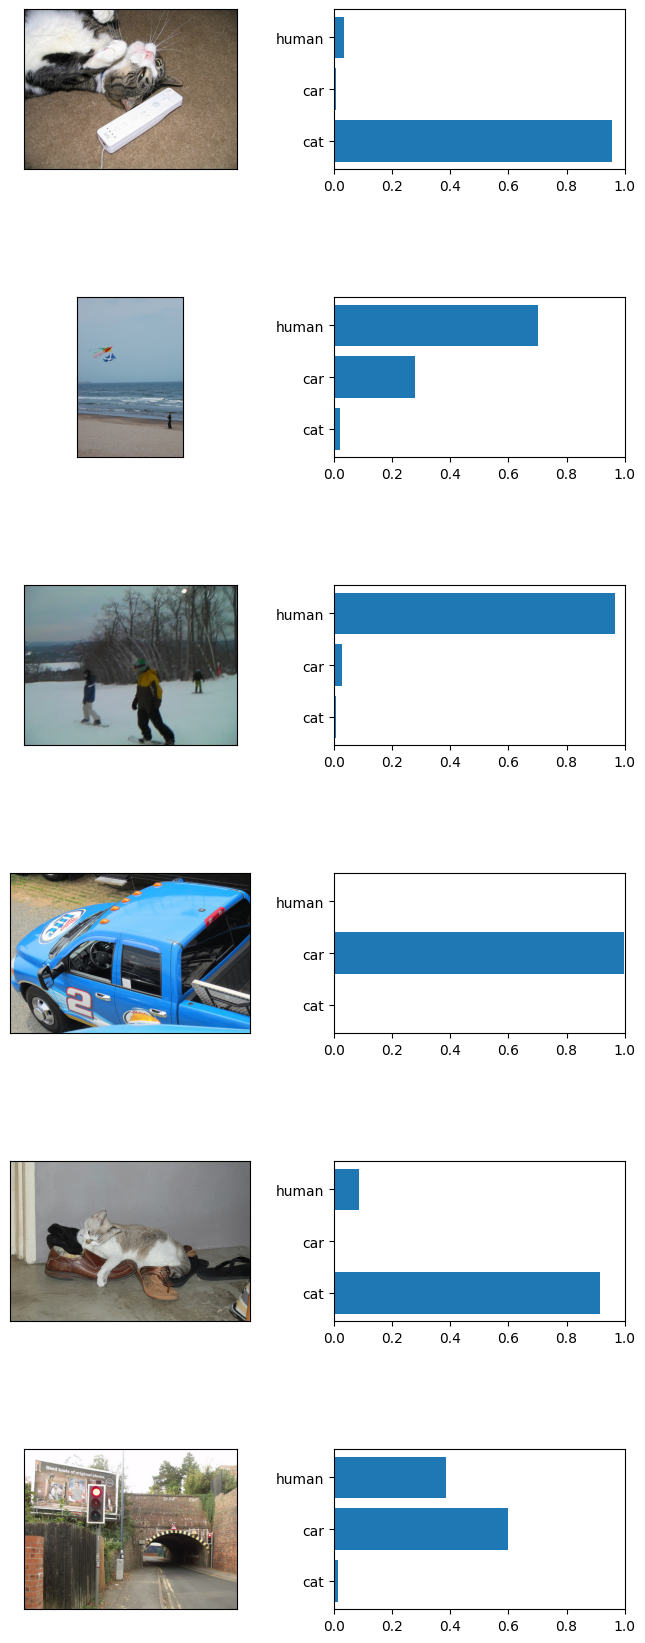

In [32]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 20))

for idx in range(len(images)):

    # show original image
    fig.add_subplot(len(images), 2, 2*(idx+1)-1 )
    plt.imshow(images[idx])
    plt.xticks([])
    plt.yticks([])

    # show probabilities
    fig.add_subplot(len(images), 2, 2*(idx+1))
    plt.barh(range(len(probs[0].detach().numpy())),probs[idx].detach().numpy(), tick_label=classes)
    plt.xlim(0,1.0)

    plt.subplots_adjust(left=0.1,
                        bottom=0.1,
                        right=0.9,
                        top=0.9,
                        wspace=0.2,
                        hspace=0.8)

plt.show()

## Sentence Embedding

In [33]:
from transformers import AutoTokenizer, CLIPModel
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = tokenizer(["Cat is lying on sandals"], padding=True, return_tensors="pt")
text_features = model.get_text_features(**inputs).detach().numpy()

In [34]:
text_features.shape

(1, 512)

In [35]:
text_features

array([[ 7.66536295e-02, -3.57280940e-01, -8.12807679e-02,
        -2.60619164e-01, -3.03089052e-01,  2.96334207e-01,
        -5.27865052e-01, -7.06241429e-01, -1.44819289e-01,
         4.23798263e-02,  4.59305495e-01, -4.51198250e-01,
         2.55052000e-01,  1.86052084e-01, -4.89524901e-01,
         7.86181390e-02, -5.08206487e-01, -2.99533904e-01,
        -9.79139879e-02,  7.33425021e-02,  1.76200554e-01,
         2.09565714e-01,  1.47021294e-01,  6.38273239e-01,
         7.34520257e-02, -4.34560180e-02,  1.49200305e-01,
         3.25273037e-01, -1.05477348e-01,  3.09719920e-01,
        -1.16131037e-01, -5.25423288e-02, -1.16751708e-01,
        -7.87808895e-02, -3.05956006e-01, -2.27657035e-01,
         5.63416719e-01,  2.72233546e-01,  3.87665600e-01,
         2.62186587e-01,  2.39764914e-01, -1.63508192e-01,
         3.39034677e-01, -3.22781652e-01,  9.96527970e-02,
         1.74883664e-01, -2.08316475e-01, -1.60441130e-01,
        -2.77177662e-01, -1.04306921e-01,  2.55652905e-0

## Image Vectorization

In [ ]:
from transformers import AutoTokenizer, CLIPModel
tokenizer = AutoTokenizer.from_pretrained("openai/clip-vit-base-patch32")

inputs = processor(images=images, return_tensors="pt")
image_features = model.get_image_features(**inputs).detach().numpy()

In [36]:
image_features.shape

(6, 512)

In [37]:
image_features[0]

array([-3.22770596e-01, -4.79449518e-02, -2.82194793e-01,  2.59704888e-01,
        6.66252524e-03,  2.42304310e-01, -1.00227229e-01, -7.91200101e-02,
        2.53642172e-01,  2.78388798e-01,  3.43257993e-01, -5.22864878e-01,
        8.64011943e-01,  2.13688523e-01,  2.20405310e-03, -3.40647161e-01,
       -1.76023796e-01, -5.93284845e-01,  9.57682729e-04, -1.47760779e-01,
       -8.84877563e-01, -4.38847095e-02,  3.74683291e-01, -3.24973166e-02,
       -6.03628635e-01,  3.48604262e-01,  1.36568338e-01,  1.45694107e-01,
       -9.35785100e-02, -3.91767383e-01, -1.54038295e-01,  2.73573339e-01,
        2.43269801e-02, -1.48572713e-01,  1.97492391e-01,  1.08525157e-02,
        6.09255433e-01, -4.47459072e-02, -1.66965455e-01,  6.59124374e-01,
       -5.26426673e-01, -2.13253915e-01,  1.45785034e-01, -2.66333893e-02,
        4.61213589e-02, -9.20698047e-03,  5.38867831e-01,  1.48211211e-01,
       -2.19912767e-01, -2.70822108e-01,  1.34238927e-02,  3.32190394e-01,
       -8.90482664e-02,  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import CLIPModel, CLIPImageProcessor


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


# Initialize the CLIP model and processor from Hugging Face
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16").to(device)
processor = CLIPImageProcessor.from_pretrained("openai/clip-vit-base-patch16")


# Load the CIFAR-10 dataset
cifar_transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to fit CLIP's input size
    transforms.ToTensor()
])

cifar_train = datasets.CIFAR10(root='./data', train=True, download=True, transform=cifar_transform)
cifar_test = datasets.CIFAR10(root='./data', train=False, download=True, transform=cifar_transform)

train_loader = DataLoader(cifar_train, batch_size=32, shuffle=True)
test_loader = DataLoader(cifar_test, batch_size=32, shuffle=False)


# For extracting features:
# For extracting features:
def extract_features(loader):
    features, labels = [], []

    with torch.no_grad():
        for images, lbls in loader:
            images = images.to(device)
            # Create dummy text input
            dummy_text = ["a" for _ in range(len(lbls))]  # You can use any dummy text you like

            # Process the images and dummy text using the processor
            inputs = processor(text=dummy_text, images=images, return_tensors="pt", padding=True, truncation=True)
            pixel_values = inputs.pixel_values.to(device)

            outputs = model(pixel_values=pixel_values)
            image_features = outputs.image_embeds
            features.append(image_features.cpu())
            labels.append(lbls)

    return torch.cat(features), torch.cat(labels)


X_train, y_train = extract_features(train_loader)
X_test, y_test = extract_features(test_loader)

# Define a simple classifier
classifier = nn.Linear(512, 10).to(device)  # Assuming 512 is the feature size from CLIP
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(classifier.parameters(), lr=0.001)

# Train the classifier
epochs = 5
for epoch in range(epochs):
    classifier.train()
    running_loss = 0.0

    inputs, labels = X_train.to(device), y_train.to(device)
    optimizer.zero_grad()
    outputs = classifier(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item()

    print(f"Epoch {epoch+1}/{epochs} - Loss: {running_loss/len(train_loader)}")

# Test the classifier
classifier.eval()
correct = 0
total = 0
with torch.no_grad():
    inputs, labels = X_test.to(device), y_test.to(device)
    outputs = classifier(inputs)
    _, predicted = torch.max(outputs, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()

print(f"Accuracy: {100 * correct / total}%")
